# **`Ensemble Techniques And Its Types-4`**

`Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link`

`Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.`

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("heart_disease_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are no missing values 
#### Categorical columns are already encoded

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### feature scaling is required as features are in different units

In [6]:
## Splitting the data into feautres and target
X = df.drop("target",axis=1)
y = df.target

`Q2. Split the dataset into a training set (70%) and a test set (30%).`

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape , X_test.shape

((212, 13), (91, 13))

#### Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

`Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.`

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,max_depth=10)

In [11]:
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10)

In [12]:
y_pred = classifier.predict(X_test_scaled)

`Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.`

In [13]:
from sklearn.metrics import classification_report
print("Performance metrics")
print(classification_report(y_test,y_pred))

Performance metrics
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



`Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.`

In [14]:
#### Get the feature importance scores from the trained model:

importances = classifier.feature_importances_

In [15]:
importances

array([0.08684899, 0.02855343, 0.12007712, 0.07509825, 0.07256409,
       0.01333296, 0.02138917, 0.12132326, 0.06993559, 0.10217548,
       0.0563211 , 0.14603706, 0.0863435 ])

In [16]:
#### Sort the feature importances in descending order and get the corresponding feature names:
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

In [17]:
#top 5 features and their scores
top_5_index = np.argsort(importances)[::-1][:5]
top_5_features = X_train.columns[top_5_index]
top_5_df = pd.DataFrame({"Feature":top_5_features, "score": importances[top_5_index]} )
top_5_df

,Feature,score
0,ca,0.146037
1,thalach,0.121323
2,cp,0.120077
3,oldpeak,0.102175
4,age,0.086849


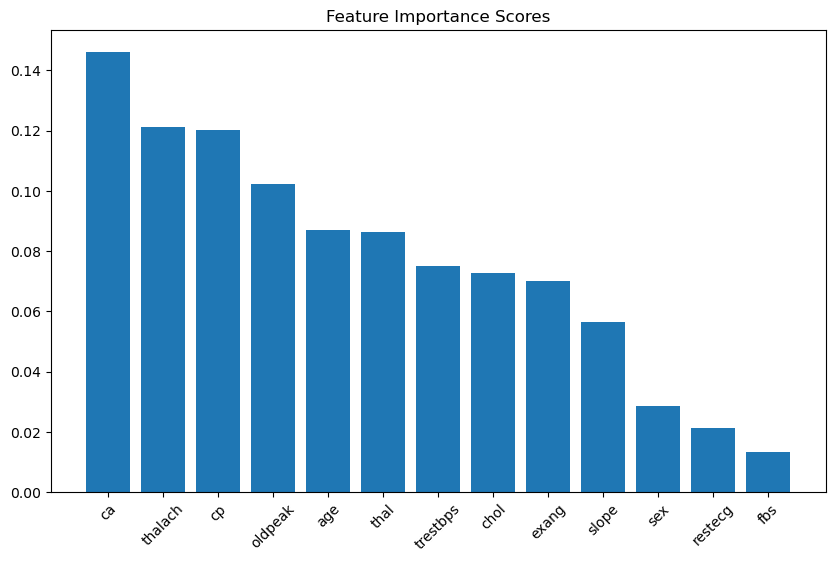

In [18]:
#visualizing the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.title("Feature Importance Scores")
plt.show()

`Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.`

In [19]:
#hyperparameter tuning with grid search cv
classifier = RandomForestClassifier()

In [20]:
params = {
    "max_depth" : [3,5,10,None],
    "n_estimators" : [100,200,300],
    "criterion" : ["gini" , "entropy","log_loss"],
    "min_samples_split" : [2,3,4],
    "min_samples_leaf" : [1,2,3]
}

In [21]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(classifier, param_grid= params , scoring= "accuracy" , cv = 5 , verbose = 3)

In [22]:
clf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.907 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.4s
[CV 3

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

`Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.`

In [23]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [24]:
classifier = RandomForestClassifier(n_estimators=100,criterion="gini",max_depth=None, min_samples_leaf=3,min_samples_split=2)

In [25]:
classifier.fit(X_train_scaled,y_train)

RandomForestClassifier(min_samples_leaf=3)

In [26]:
y_pred_cv = classifier.predict(X_test_scaled)

In [27]:
print("Performance metrics")
print(classification_report(y_test,y_pred_cv))

Performance metrics
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#### Precision , Recall , F1 score and Accuracy of the tuned model is better than the default model atleast by 0.1 to 1%

`Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.`

In [28]:
X = df[["ca","cp"]]
y = df.target

In [29]:
classifier = RandomForestClassifier(n_estimators=100,criterion="gini",max_depth=None, min_samples_leaf=3,min_samples_split=2)

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
classifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=3)

In [32]:
#create a meshgrid of points to plot the decision boundary
# Set the step size of the mesh
h = 0.02

# Get the minimum and maximum values of the two features
x_min, x_max = X_train["ca"].min() - 1, X_train["ca"].max() + 1
y_min, y_max = X_train["cp"].min() - 1, X_train["cp"].max() + 1

# Create a meshgrid of points with the step size h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [33]:
# Use the Random Forest classifier to predict the class labels of the meshgrid points:
# Predict the class labels of the meshgrid points
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to the shape of the meshgrid
Z = Z.reshape(xx.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


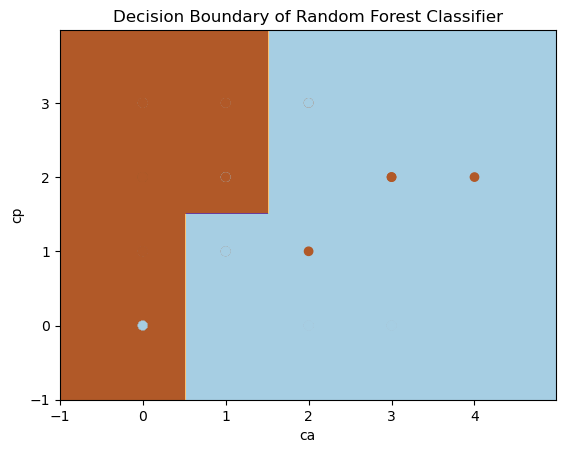

In [34]:
# Plot the decision boundary with a contour plot:

# Plot the decision boundary with a contour plot
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# Plot the training data
plt.scatter(X_train["ca"], X_train["cp"], c=y_train, cmap=plt.cm.Paired)

# Set the axis labels and title
plt.xlabel('ca')
plt.ylabel('cp')
plt.title('Decision Boundary of Random Forest Classifier')

# Show the plot
plt.show()

Observations about the decision boundry:

To interpret and analyze the decision boundary of the Random Forest classifier, we can look at how it separates the two classes in the feature space. The contour plot shows the decision boundary as a line that separates the two regions of the plot that correspond to the different classes. The regions are colored differently to make it clear which points belong to which class. We can also see the observations that are misclassified (opposite colors). The ideal classifier will yield a decision boundry as a straight line. 

1. Overfitting: The decision boundary is slightly jagged and seems to fit the training data very closely, it may be overfitting the data. This means that the classifier has learned the training data too well and is not generalizing well to new data. In this case, we may want to adjust the hyperparameters of the Random Forest classifier to reduce overfitting, or try a different model altogether.

2. Nonlinear decision boundaries: Random Forest classifier can capture nonlinear decision boundaries that are not possible with simple linear models. We can visualize these decision boundaries in the feature space to gain a better understanding of how the classifier is separating the data.

**Insights**:

1. Handles high-dimensional data: Random Forest is able to handle large datasets with many features, making it a good choice for healthcare data that often contains many variables.

2. Nonlinear relationships: Random Forest can capture nonlinear relationships between features, allowing it to model complex patterns in the data that may not be captured by traditional linear models.

3. Robust to noise: Random Forest is relatively robust to noisy data, meaning that it can still perform well even if there is some error or inconsistency in the data.

4. Feature importance: Random Forest can provide insights into which features are most important for predicting heart disease risk, which can help identify risk factors that may be overlooked by traditional methods.

**Limitations**:

1. Model complexity: Random Forest is a complex model with many hyperparameters that need to be tuned, which can make it difficult to interpret and optimize.

2. Overfitting: Random Forest is prone to overfitting as demonstrated above in the decision boundry graph if the model is too complex or if there is not enough data, which can lead to poor generalization performance on new data.

3. Imbalanced data: Random Forest can struggle with imbalanced datasets, where there are significantly more instances of one class than the other, which can result in biased predictions.

4. Interpretability: Random Forest is not always easy to interpret, especially when dealing with high-dimensional data or large numbers of features. This can make it difficult to gain insights into how the model is making its predictions.